<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.4
# *PCA Lab*

**In this lab, we will:**
- Explore how PCA is related to correlation.
- Use PCA to perform dimensionality reduction.

### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [ ]:
# IMPORT LABRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
breast_cancer_csv = '/Users/uchino/Desktop/IoD/breast-cancer-wisconsin-data.csv'
breast_cancer = pd.read_csv(breast_cancer_csv, index_col='id')

### 2. EDA 

Explore dataset. Clean data. Find correlation. 

In [ ]:
breast_cancer.head()

In [ ]:
breast_cancer.shape

In [ ]:
breast_cancer.info()


In [ ]:
breast_cancer.drop(labels='Unnamed: 32', axis=1, inplace=True)

In [ ]:
breast_cancer['diagnosis'].value_counts(normalize=True).plot(kind='bar');

In [ ]:
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(breast_cancer.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(breast_cancer.corr(), mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show();

### 3. Subset & Normalize

Subset the data to only include all columns except diagnosis. We will be comparing the principal components to age specifically, so we are leaving age out.

In [ ]:
# ANSWER
from sklearn.preprocessing import StandardScaler

In [ ]:
breast_cancer.columns

In [ ]:
target_column = 'diagnosis'

# Save feature column names as a list 
feature_columns = breast_cancer.columns.drop('diagnosis')
#feature_columns = [c for c in breast_cancer.columns if c != 'diagnosis']
feature_columns

In [ ]:
X = breast_cancer[feature_columns]
y = breast_cancer['diagnosis']

In [ ]:
X.head()

In [ ]:
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

In [ ]:
Xs

### Calculate correlation matrix

We will be using the correlation matrix to calculate the eigenvectors and eigenvalues.

In [ ]:
feature_columns

In [ ]:
pd.DataFrame(Xs, columns=feature_columns)

In [ ]:
Xcorr = pd.DataFrame(Xs, columns=feature_columns).corr()
Xcorr

In [ ]:
type(Xcorr)

### 4. Calculate the eigenvalues and eigenvectors from the correlation matrix

numpy has a convenient function to calculate this:

    eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)

In [ ]:
# ANSWER
eig_vals, eig_vecs = np.linalg.eig(Xcorr)

In [ ]:
len(eig_vals)

In [ ]:
eig_vals

In [44]:
len(eig_vecs)

30

In [45]:
eig_vals[0]

13.281607682257906

In [46]:
eig_vecs[0]

array([ 0.21890244, -0.23385713, -0.00853124,  0.04140896, -0.03778635,
        0.01874079,  0.12408834,  0.0074523 , -0.22310976,  0.09548644,
        0.04147149,  0.05106746,  0.01196721, -0.05950613, -0.05111877,
        0.15058388, -0.20292425, -0.14671234,  0.22538466,  0.70241409,
       -0.21146046,  0.21119401, -0.13152667,  0.1294764 ,  0.0192265 ,
       -0.18257944,  0.09855269, -0.0729289 , -0.04969866,  0.06857001])

### 5. Calculate and plot the explained variance

A useful measure is the **explained variance**, which is calculated from the eigenvalues. 

The explained variance tells us how much information (variance) is captured by each principal component.

### $$ ExpVar_i = \bigg(\frac{eigenvalue_i}{\sum_j^n{eigenvalue_j}}\bigg) * 100$$

In [47]:
def calculate_cum_var_exp(eig_vals):
    tot = sum(eig_vals)
    #var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
    #var_exp = [(i / tot)*100 for i in eig_vals]
    var_exp = []
    for i in eigvals:
        var_i = ((i / tot)*100)
        var_exp.append(var_i)
    cum_var_exp = np.cumsum(var_exp)
    return cum_var_exp

In [48]:
def plot_var_exp(eig_vals):
    
    cum_var_exp = calculate_cum_var_exp(eig_vals)
    
    plt.figure(figsize=(9,7))

    component_number = [i+1 for i in range(len(cum_var_exp))]

    plt.plot(component_number, cum_var_exp, lw=7)

    plt.axhline(y=0, linewidth=5, color='grey', ls='dashed')
    plt.axhline(y=100, linewidth=3, color='grey', ls='dashed')

    ax = plt.gca()
    ax.set_xlim([1,30])
    ax.set_ylim([-5,105])

    ax.set_ylabel('cumulative variance explained', fontsize=16)
    ax.set_xlabel('component', fontsize=16)

    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(12) 

    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(12) 

    ax.set_title('component vs cumulative variance explained\n', fontsize=20)

    plt.show()

In [49]:
plot_var_exp(eig_vals)

NameError: name 'eigvals' is not defined

### 6. Using sklearn For PCA

    from sklearn.decomposition import PCA
    
- Create an instance of PCA
- Fit X
- Plot the explained variance
- Define n_components
    - n_component
- Apply dimensionality reduction to X
    - transform
- Create PairPlot of PCA

In [34]:
from sklearn.decomposition import PCA

In [35]:
# Instantiate the PCA class and set at 16 components 
breast_pca = PCA()

# Fit PCA with standardised features
breast_pca.fit(Xs)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

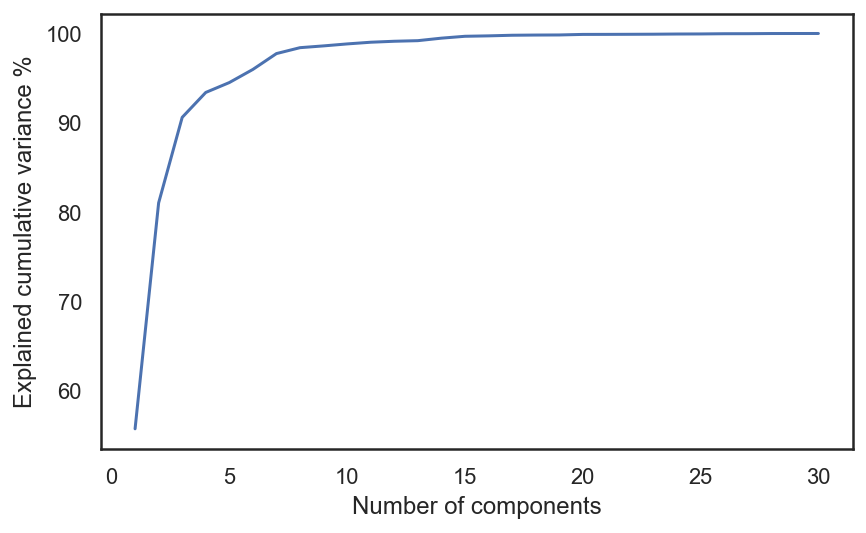

In [36]:
# Plot cumulative variance explained vs number of components
plt.plot(range(1, 31), 100 - (100*breast_pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Explained cumulative variance %')
plt.show()

In [37]:
# Transform standardised data with PCA
breast_pca = PCA(n_components=16)

# Fit PCA with standardised features
breast_pca.fit(Xs)
std_x_pca = breast_pca.transform(Xs)

In [38]:
pd.DataFrame(std_x_pca).head()

0          1         2         3         4         5         6   \
0  9.192837   1.948583 -1.123166  3.633731 -1.195110  1.411424  2.159370   
1  2.387802  -3.768172 -0.529293  1.118264  0.621775  0.028656  0.013358   
2  5.733896  -1.075174 -0.551748  0.912083 -0.177086  0.541452 -0.668166   
3  7.122953  10.275589 -3.232790  0.152547 -2.960878  3.053422  1.429911   
4  3.935302  -1.948072  1.389767  2.940639  0.546747 -1.226495 -0.936213   

         7         8         9         10        11        12        13  \
0 -0.398407 -0.157118 -0.877402  0.262955 -0.859014  0.103388 -0.690805   
1  0.240988 -0.711905  1.106995  0.813120  0.157923 -0.943529 -0.653474   
2  0.097374  0.024066  0.454275 -0.605604  0.124387 -0.410627  0.016680   
3  1.059565 -1.405440 -1.116975 -1.151514  1.011316 -0.933271 -0.487415   
4  0.636376 -0.263805  0.377704  0.651360 -0.110515  0.387948 -0.539180   

         14        15  
0 -0.601796  0.745129  
1  0.008978 -0.648824  
2  0.483420  0.325109  
3 -0.168843  0.051348  
4  0.310320 -0.152608

In [39]:
pd.DataFrame(Xs, columns=feature_columns)

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0       1.097064     -2.073335        1.269934   0.984375         1.568466   
1       1.829821     -0.353632        1.685955   1.908708        -0.826962   
2       1.579888      0.456187        1.566503   1.558884         0.942210   
3      -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4       1.750297     -1.151816        1.776573   1.826229         0.280372   
..           ...           ...             ...        ...              ...   
564     2.110995      0.721473        2.060786   2.343856         1.041842   
565     1.704854      2.085134        1.615931   1.723842         0.102458   
566     0.702284      2.045574        0.672676   0.577953        -0.840484   
567     1.838341      2.336457        1.982524   1.735218         1.525767   
568    -1.808401      1.221792       -1.814389  -1.347789        -3.112085   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0            3.283515        2.652874             2.532475       2.217515   
1           -0.487072       -0.023846             0.548144       0.001392   
2            1.052926        1.363478             2.037231       0.939685   
3            3.402909        1.915897             1.451707       2.867383   
4            0.539340        1.371011             1.428493      -0.009560   
..                ...             ...                  ...            ...   
564          0.219060        1.947285             2.320965      -0.312589   
565         -0.017833        0.693043             1.263669      -0.217664   
566         -0.038680        0.046588             0.105777      -0.809117   
567          3.272144        3.296944             2.658866       2.137194   
568         -1.150752       -1.114873            -1.261820      -0.820070   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
0                  2.255747  ...      1.886690      -1.359293   
1                 -0.868652  ...      1.805927      -0.369203   
2                 -0.398008  ...      1.511870      -0.023974   
3                  4.910919  ...     -0.281464       0.133984   
4                 -0.562450  ...      1.298575      -1.466770   
..                      ...  ...           ...            ...   
564               -0.931027  ...      1.901185       0.117700   
565               -1.058611  ...      1.536720       2.047399   
566               -0.895587  ...      0.561361       1.374854   
567                1.043695  ...      1.961239       2.237926   
568               -0.561032  ...     -1.410893       0.764190   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0           2.303601    2.001237          1.307686           2.616665   
1           1.535126    1.890489         -0.375612          -0.430444   
2           1.347475    1.456285          0.527407           1.082932   
3          -0.249939   -0.550021          3.394275           3.893397   
4           1.338539    1.220724          0.220556          -0.313395   
..               ...         ...               ...                ...   
564         1.752563    2.015301          0.378365          -0.273318   
565         1.421940    1.494959         -0.691230          -0.394820   
566         0.579001    0.427906         -0.809587           0.350735   
567         2.303601    1.653171          1.430427           3.904848   
568        -1.432735   -1.075813         -1.859019          -1.207552   

     concavity_worst  concave points_worst  symmetry_worst  \
0           2.109526              2.296076        2.750622   
1          -0.146749              1.087084       -0.243890   
2           0.854974              1.955000        1.152255   
3           1.989588              2.175786        6.046041   
4           0.613179              0.729259       -0.868353   
..               ...                   ...             ...   
564         0.664512              1.629151       -1

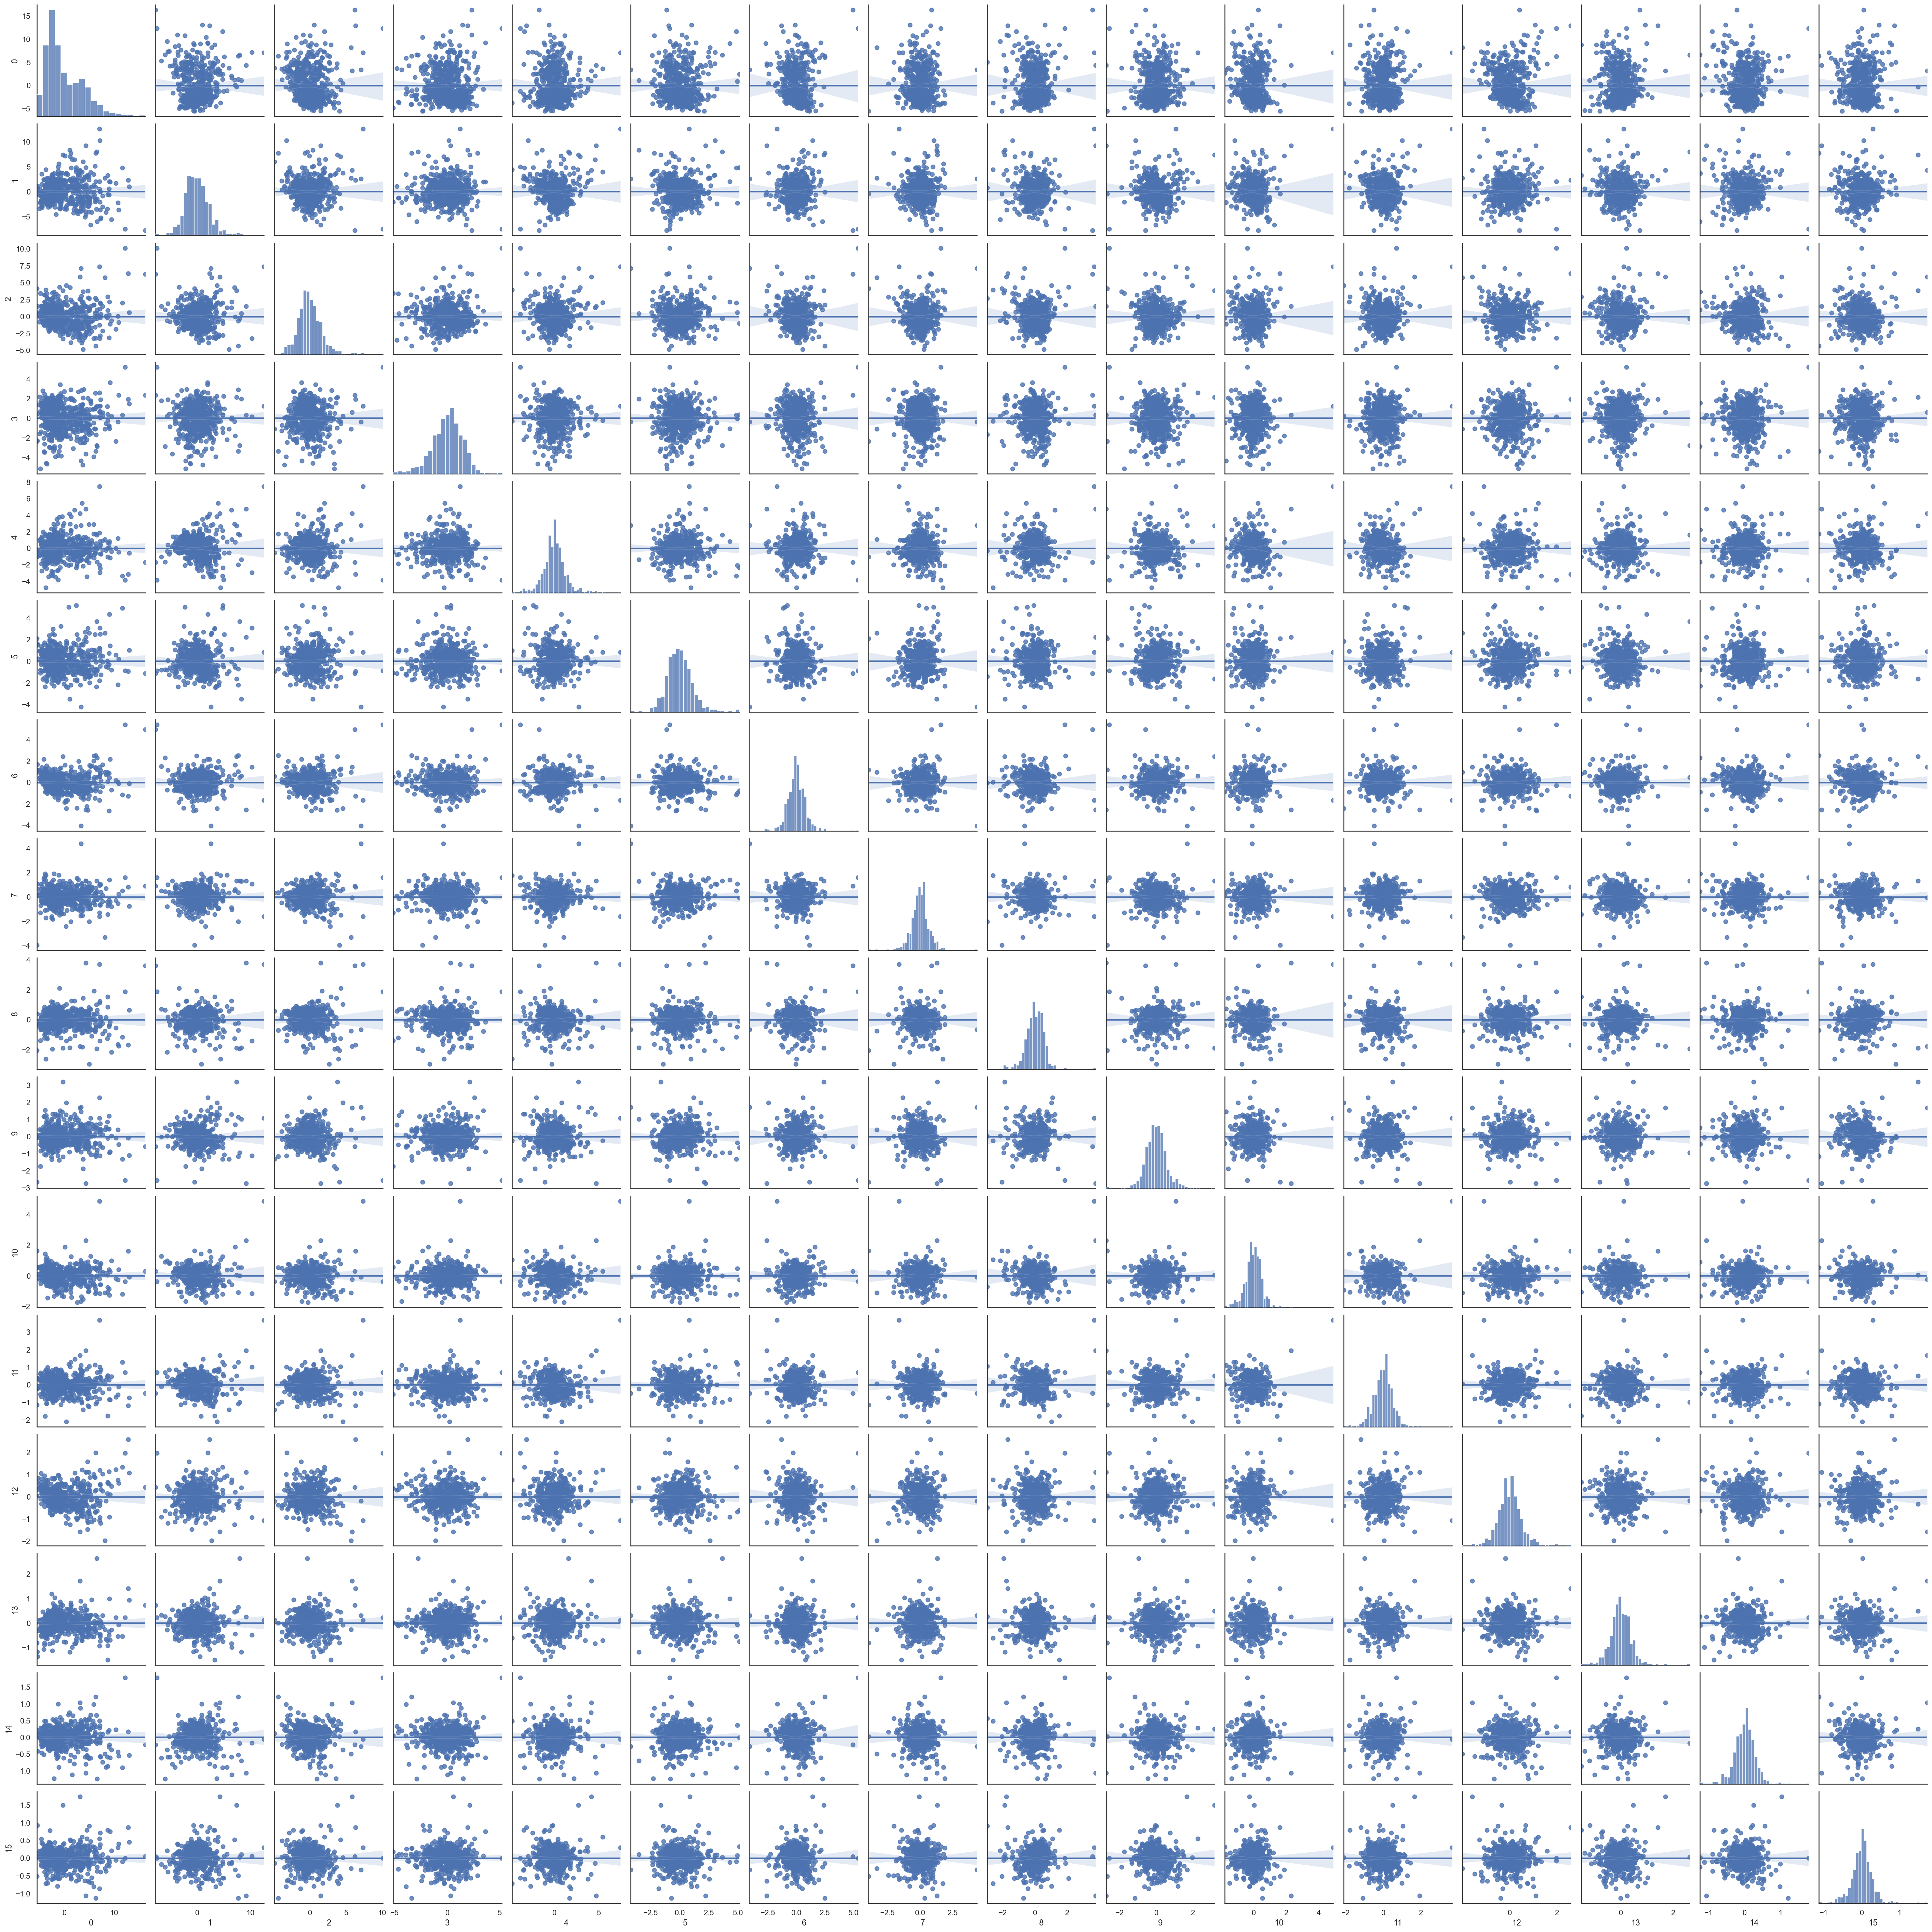

In [40]:
sns.pairplot(pd.DataFrame(std_x_pca), kind='reg');

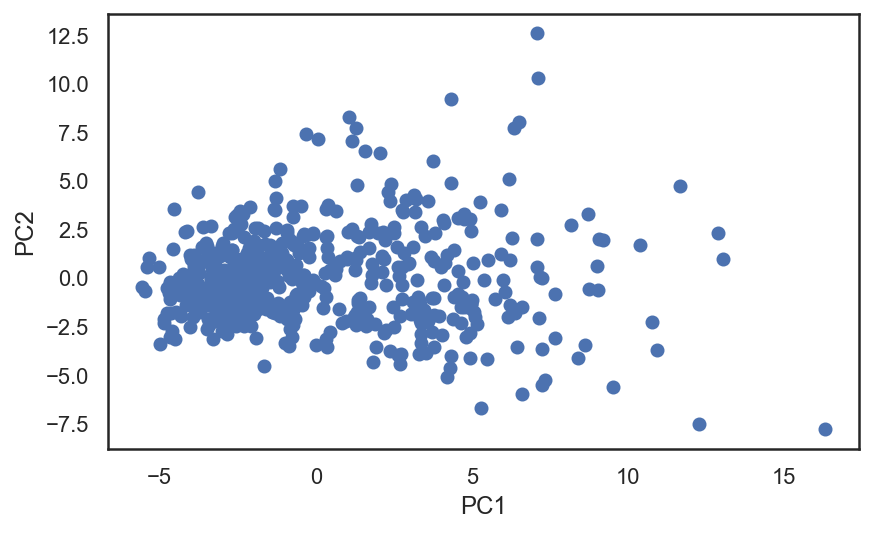

In [41]:
# Plot PC1 vs PC2
plt.scatter(std_x_pca[:, 0], std_x_pca[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### 7. Split Data to 80/20 and Use PCA you gon in 6 as X

Split data 80/20 and Use KNN to find score.

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [43]:
# Split PCA
X_train, X_test, y_train, y_test = train_test_split(std_x_pca, y, test_size=0.2, random_state=42)

# Split standardised data
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs, y, test_size=0.2, random_state=42)

NameError: name 'train_test_split' is not defined

In [ ]:
# Set KNN classifier to use 5 neighbors
knn5 = KNeighborsClassifier(n_neighbors=5)

# CV accuracy of KNN using standardised data 
standard_scores = cross_val_score(knn5, Xs_train, ys_train, cv=5)
print("Number of features in standardised data:       ", Xs.shape[1])
print("5-fold CV accuracy using standardised data:    ", standard_scores.mean())

In [ ]:
# CV accuracy of KNN using PCA-transformed data
pca_scores = cross_val_score(knn5, X_train, y_train, cv=5)
print("Number of features in PCA-transformed data:    ", std_x_pca.shape[1])
print("5-fold CV accuracy using PCA-transformed data: ", pca_scores.mean())

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)

[Breast Cancer Machine Learning Prediction](https://gtraskas.github.io/post/breast_cancer/)

[Understanding PCA (Principal Component Analysis) with Python](https://towardsdatascience.com/dive-into-pca-principal-component-analysis-with-python-43ded13ead21)



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



